# EDA

In [126]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from math import sin, cos, sqrt, atan2, radians
import matplotlib.ticker as mticker
import os

In [127]:
# File path
file_path = r'C:\Users\win\Desktop\PROJETO\dados\df_clean.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,price,freight_value,product_category_name,macro_categoria
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,sp,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4,124.99,21.88,moveis_escritorio,Móveis e Decoração
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,sp,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,credit_card,8,335.48,5,289.00,46.48,utilidades_domesticas,Casa e Construção
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,sp,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,credit_card,7,157.73,5,139.94,17.79,moveis_escritorio,Móveis e Decoração
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,sp,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,credit_card,1,173.30,5,149.94,23.36,moveis_escritorio,Móveis e Decoração
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,sp,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,credit_card,8,252.25,5,230.00,22.25,casa_conforto,Móveis e Decoração


In [128]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'price', 'freight_value', 'product_category_name', 'macro_categoria'],
      dtype='object')

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,118315.00,1.09,0.73,1.00,1.00,1.00,1.00,29.00
payment_installments,118315.00,2.94,2.78,0.00,1.00,2.00,4.00,24.00
payment_value,118315.00,172.58,267.10,0.00,60.85,108.20,189.26,13664.08
review_score,118315.00,4.01,1.40,1.00,3.00,5.00,5.00,5.00
price,118315.00,120.65,184.11,0.85,39.90,74.90,134.90,6735.00
freight_value,118315.00,20.03,15.84,0.00,13.08,16.28,21.18,409.68


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               118315 non-null  object 
 1   customer_unique_id        118315 non-null  object 
 2   customer_city             118315 non-null  object 
 3   customer_state            118315 non-null  object 
 4   order_id                  118315 non-null  object 
 5   order_purchase_timestamp  118315 non-null  object 
 6   payment_sequential        118315 non-null  int64  
 7   payment_type              118315 non-null  object 
 8   payment_installments      118315 non-null  int64  
 9   payment_value             118315 non-null  float64
 10  review_score              118315 non-null  int64  
 11  price                     118315 non-null  float64
 12  freight_value             118315 non-null  float64
 13  product_category_name     118315 non-null  o

# Layout

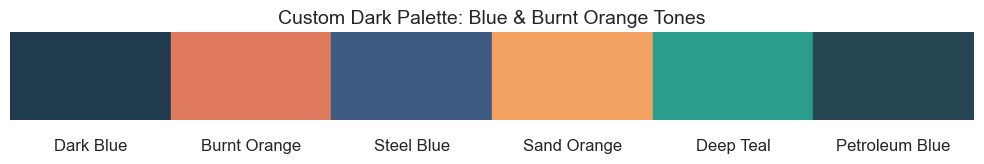

In [131]:
# Define custom dark-themed color palette
custom_palette = ['#1f3b4d', '#e07a5f', '#3d5a80', '#f4a261', '#2a9d8f', '#264653']

# Apply theme
sns.set_theme(style='whitegrid')
plt.rcParams.update({
    'figure.figsize': (10, 6),               # Default figure size
    'axes.titlesize': 16,                    # Title font size
    'axes.labelsize': 14,                    # Axis label font size
    'xtick.labelsize': 12,                   # X-axis tick font size
    'ytick.labelsize': 12,                   # Y-axis tick font size
    'legend.fontsize': 12,                   # Legend font size
    'font.family': 'sans-serif',             # Font family
    'axes.grid': True,                       # Enable gridlines
    'grid.alpha': 0.3,                       # Grid transparency
    'grid.linestyle': '--',                  # Gridline style
    'figure.autolayout': True,               # Prevent overlapping
    'axes.prop_cycle': plt.cycler(color=custom_palette)  # Set custom color cycle
})

# Define custom dark palette
custom_palette = ['#1f3b4d', '#e07a5f', '#3d5a80', '#f4a261', '#2a9d8f', '#264653']
color_names = ['Dark Blue', 'Burnt Orange', 'Steel Blue', 'Sand Orange', 'Deep Teal', 'Petroleum Blue']

# Plot color palette
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(custom_palette):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, -0.3, color_names[i], ha='center', va='center', fontsize=12)

ax.set_xlim(0, len(custom_palette))
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Custom Dark Palette: Blue & Burnt Orange Tones', fontsize=14)
plt.tight_layout()
plt.show()

# Numerical Distribution Analysis

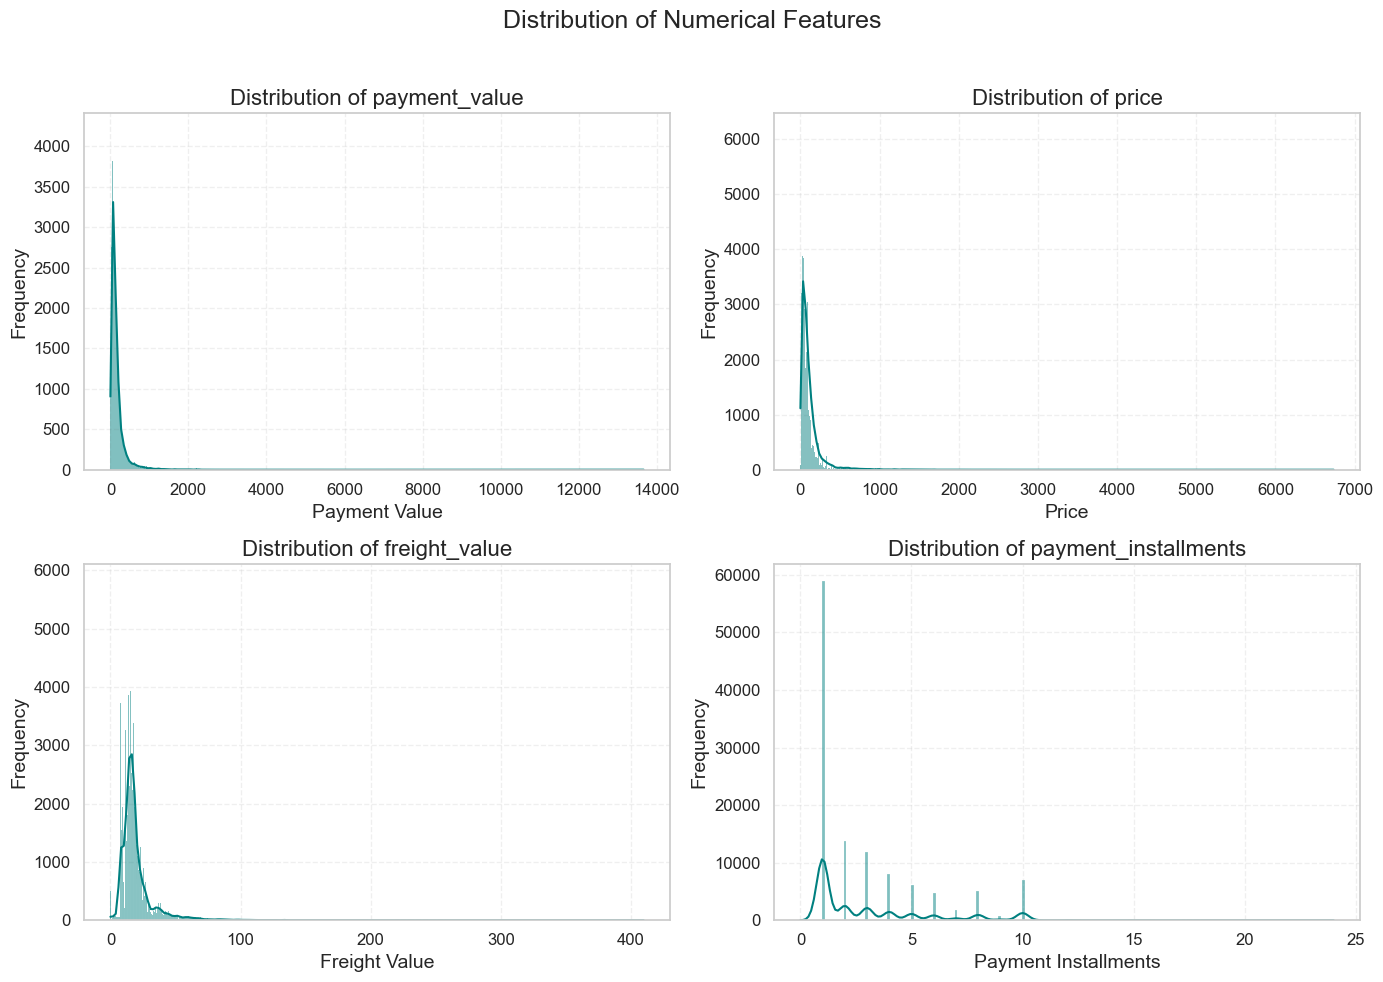

In [132]:
# Numerical features to plot
num_features = ['payment_value', 'price', 'freight_value', 'payment_installments']

# Plot distribution for each numerical feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Numerical Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Insights

* Monetary values may need a log-transformation due to Outliers
  
Visual example:

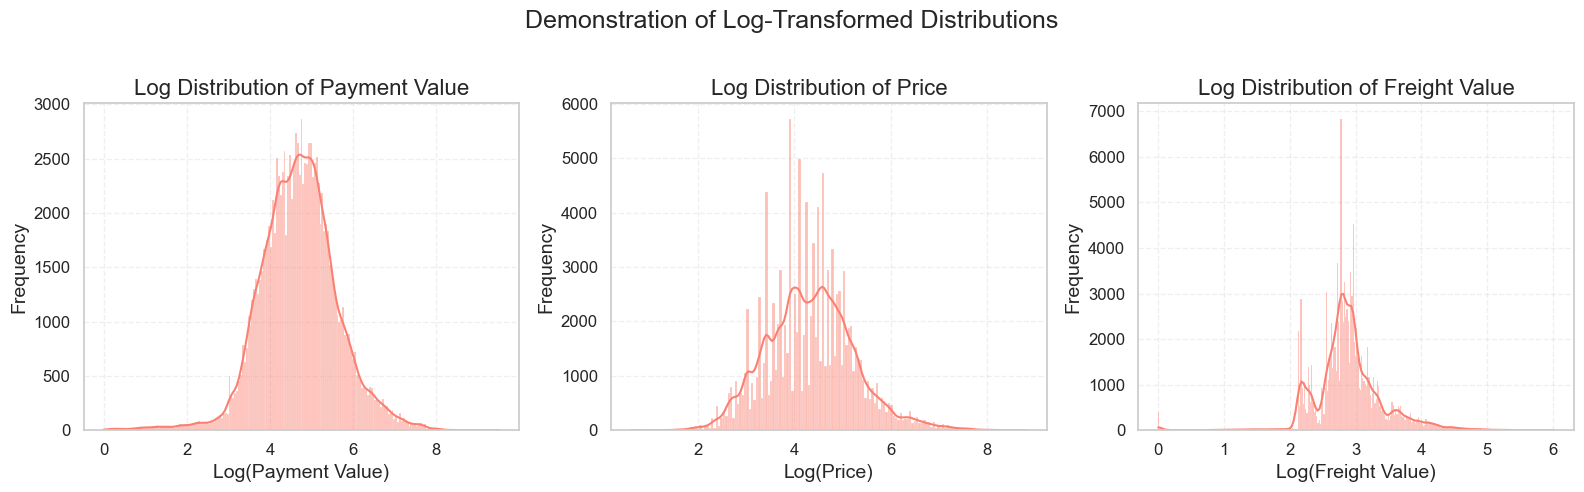

In [133]:
# List of original columns to visualize with a log transform
features_to_transform = ['payment_value', 'price', 'freight_value']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Loop over the original column names
for i, col in enumerate(features_to_transform):
    # Apply the log transformation on-the-fly for plotting only
    sns.histplot(x=np.log1p(df[col]), kde=True, ax=axes[i], color='salmon')
    
    axes[i].set_title(f'Log Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(f'Log({col.replace("_", " ").title()})')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Demonstration of Log-Transformed Distributions', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Categorical distribution analysis

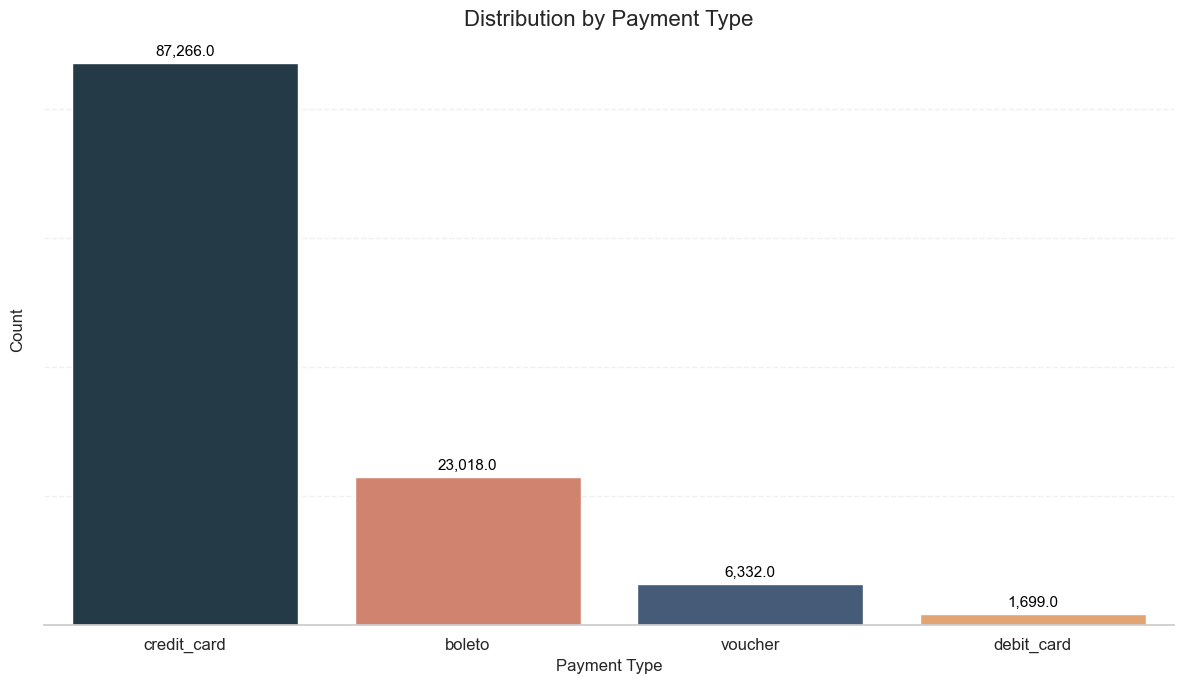

In [150]:
# Define the order of the bars by frequency
order_payment = df['payment_type'].value_counts().index

# Create the plot
plt.figure(figsize=(12, 7)) # A suitable size for this plot
ax = sns.countplot(
    data=df,
    x='payment_type',
    order=order_payment,
    palette=custom_palette
)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 8),
                textcoords='offset points')

ax.set_title('Distribution by Payment Type', fontsize=16)
ax.set_xlabel('Payment Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_yticklabels([]) # Remove y-axis ticks for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

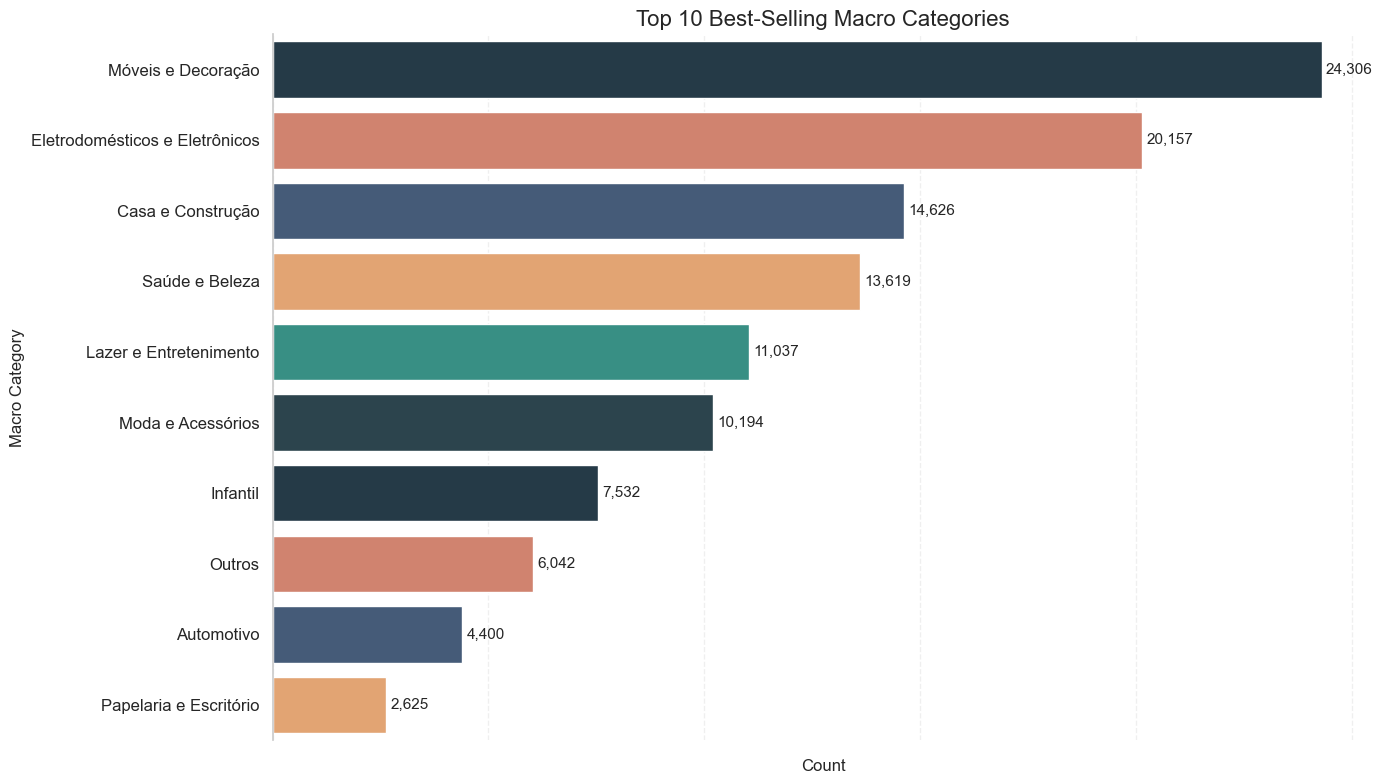

In [151]:
top_10_categories = df['macro_categoria'].value_counts().nlargest(10).index

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=df,
    y='macro_categoria', # Use y-axis for better display of long names
    order=top_10_categories,
    palette=custom_palette
)

# Add data labels next to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 100, # Position of the text
            p.get_y() + p.get_height() / 2.,
            f'{int(width):,}',
            va='center',
            fontsize=11)

ax.set_title('Top 10 Best-Selling Macro Categories', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Macro Category', fontsize=12)
ax.set_xticklabels([]) # Remove x-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

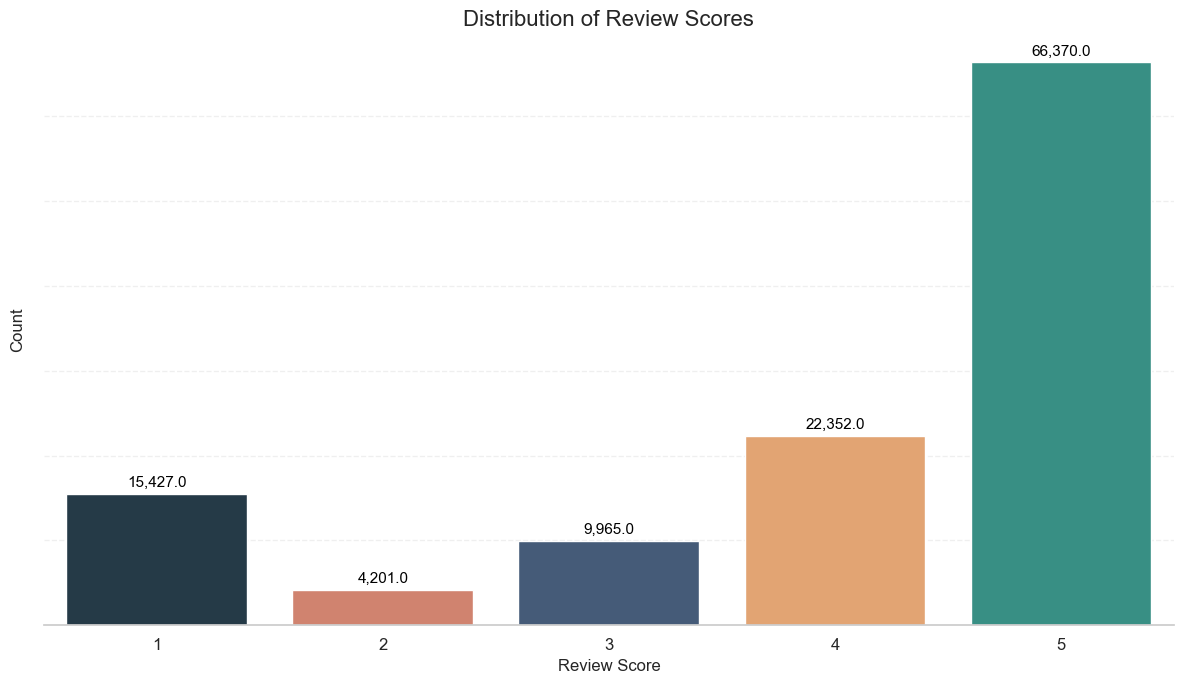

In [152]:
# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df,
    x='review_score',
    order=sorted(df['review_score'].unique()), # Order the scores from 1 to 5
    palette=custom_palette
)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 8),
                textcoords='offset points')

ax.set_title('Distribution of Review Scores', fontsize=16)
ax.set_xlabel('Review Score', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_yticklabels([]) # Remove y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# Consumption over time

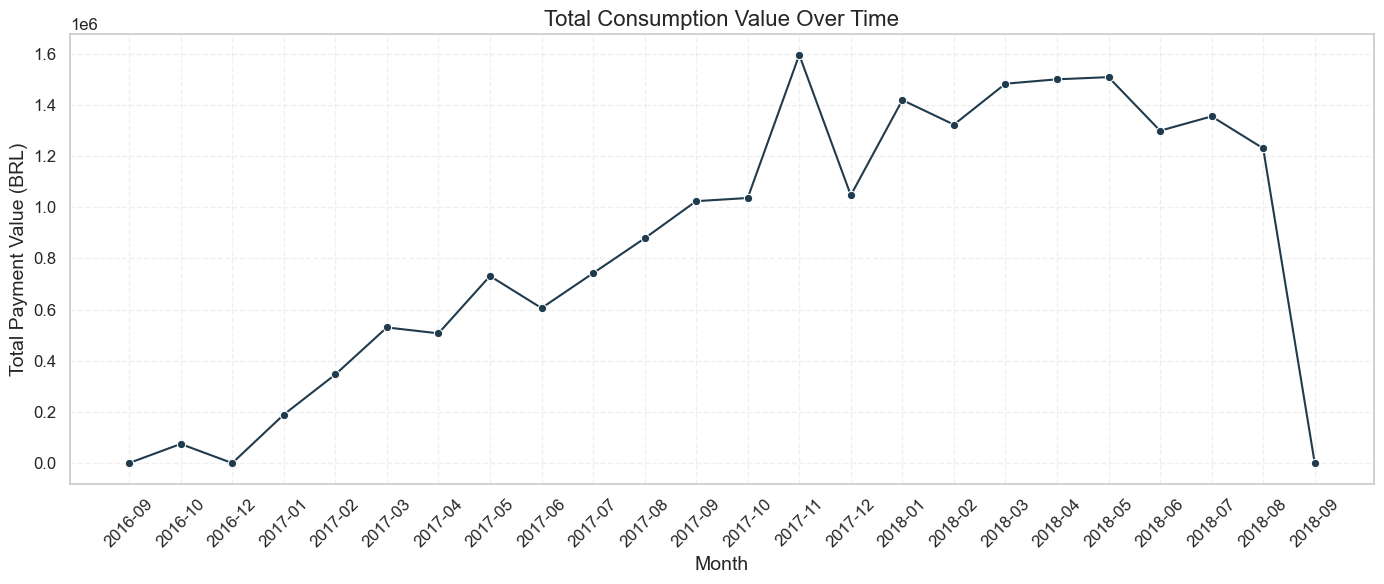

In [153]:
# Load and prepare timestamp
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_consumption = df.groupby('purchase_month')['payment_value'].sum().reset_index()
monthly_consumption['purchase_month'] = monthly_consumption['purchase_month'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_consumption, x='purchase_month', y='payment_value', marker='o')
plt.xticks(rotation=45)
plt.title('Total Consumption Value Over Time')
plt.xlabel('Month')
plt.ylabel('Total Payment Value (BRL)')
plt.tight_layout()
plt.show()

# Poduct Categories Analysis

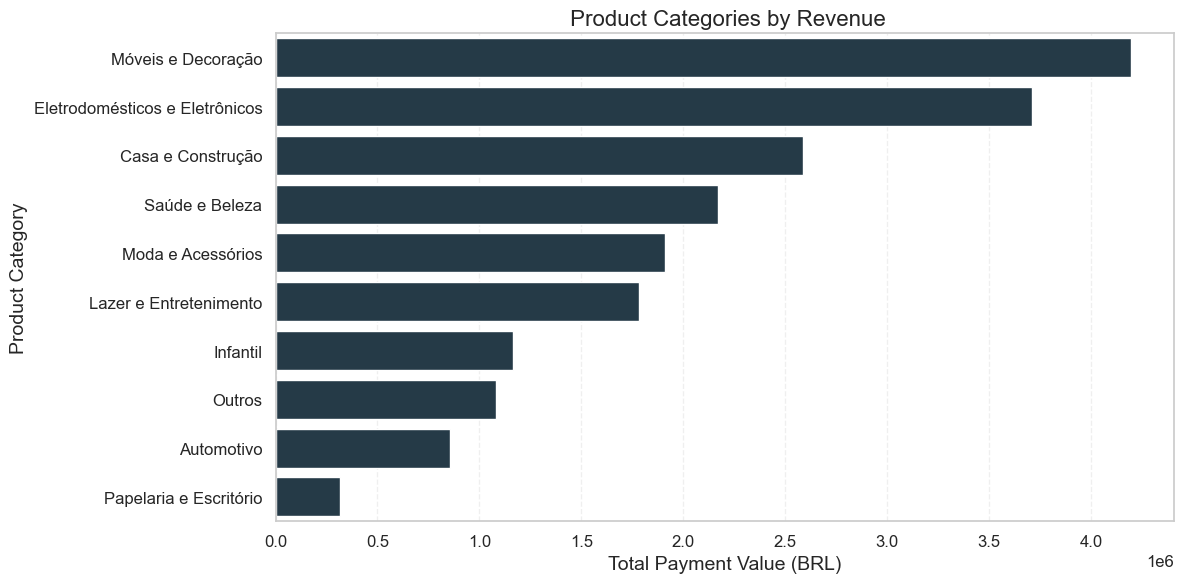

In [137]:
category_revenue = df.groupby('macro_categoria')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title(' Product Categories by Revenue')
plt.xlabel('Total Payment Value (BRL)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

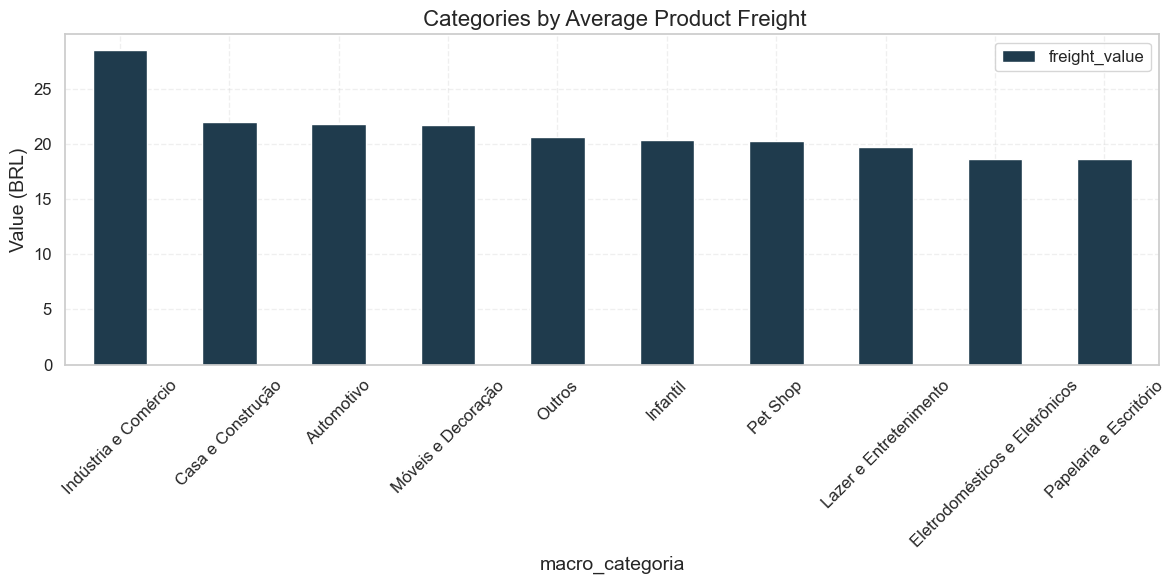

In [138]:
category_prices = df.groupby('macro_categoria')[['freight_value']].mean().sort_values(by='freight_value', ascending=False).head(10)

category_prices.plot(kind='bar', figsize=(12, 6))
plt.title(' Categories by Average Product Freight')
plt.ylabel('Value (BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Location Analysis

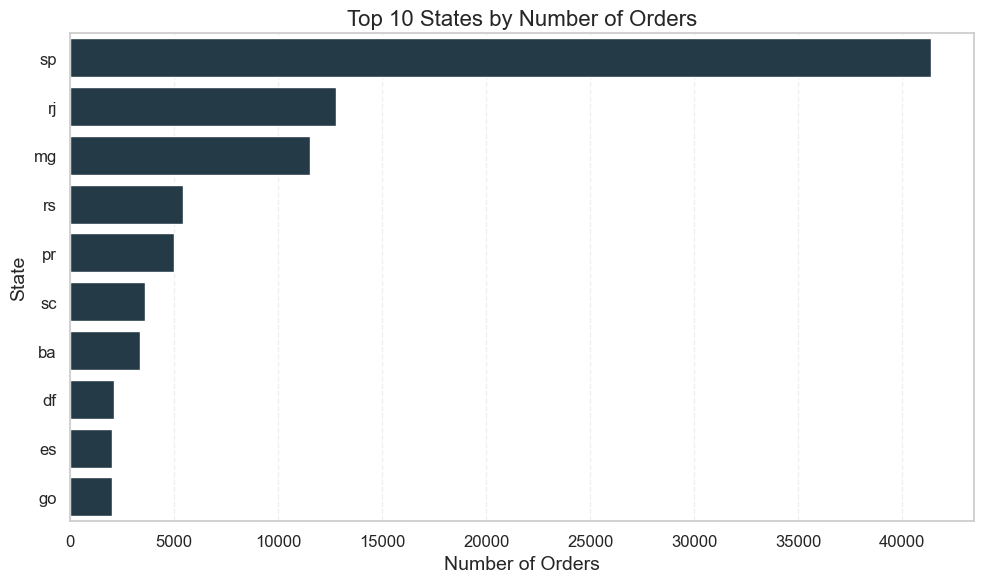

In [139]:
orders_by_state = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_state.values, y=orders_by_state.index)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()

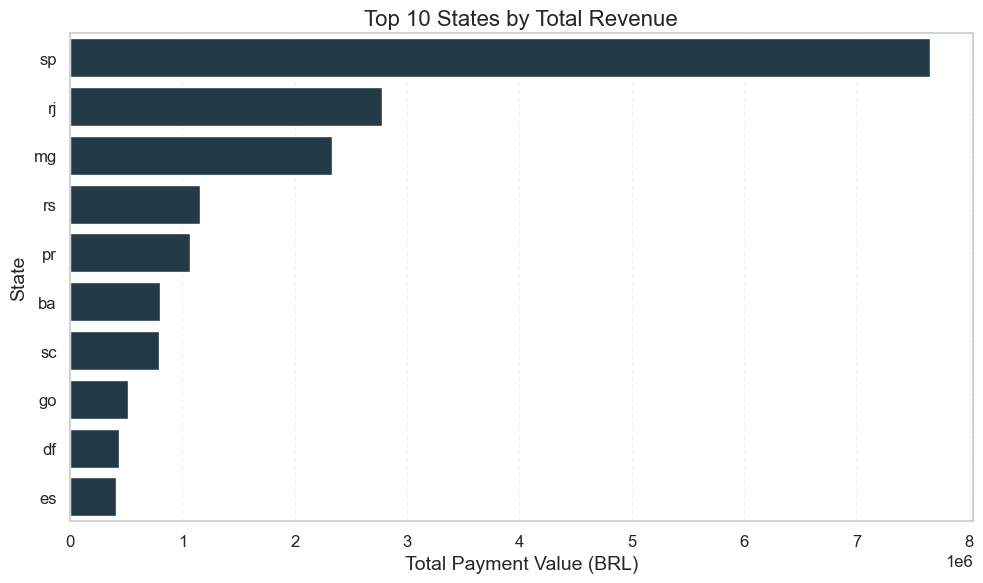

In [140]:
revenue_by_state = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_state.values, y=revenue_by_state.index)
plt.title('Top 10 States by Total Revenue')
plt.xlabel('Total Payment Value (BRL)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

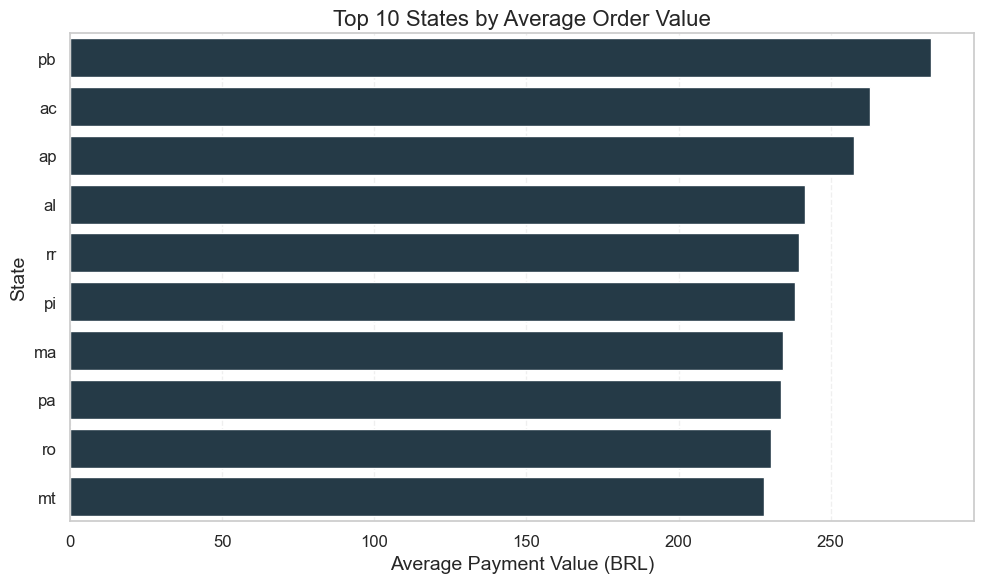

In [141]:
avg_ticket_by_state = df.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ticket_by_state.values, y=avg_ticket_by_state.index)
plt.title('Top 10 States by Average Order Value')
plt.xlabel('Average Payment Value (BRL)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

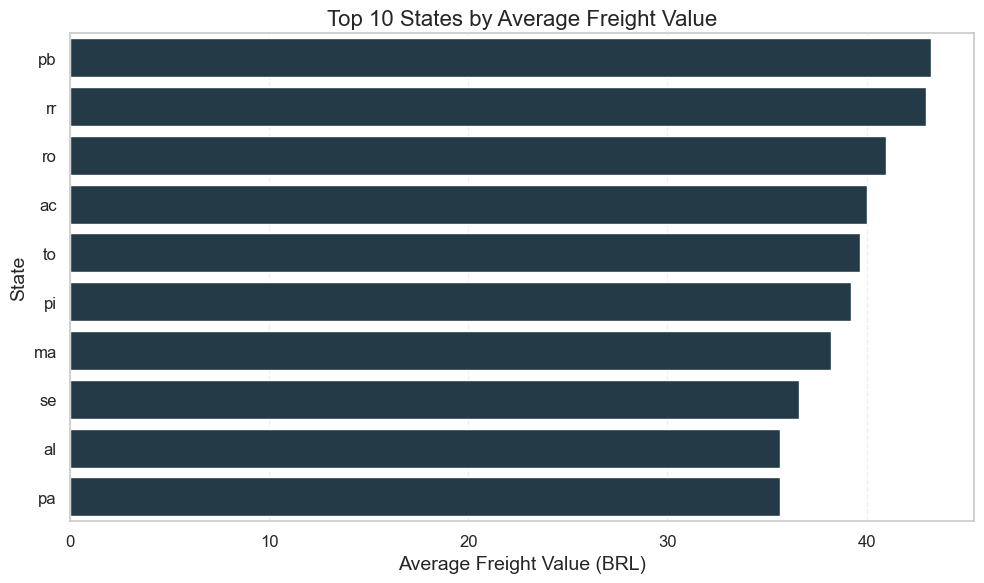

In [142]:
avg_ticket_by_freight = df.groupby('customer_state')['freight_value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ticket_by_freight.values, y=avg_ticket_by_freight.index)
plt.title('Top 10 States by Average Freight Value')
plt.xlabel('Average Freight Value (BRL)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Insights
* Higher revenues and orders are concentrated in southeast region
* states with higher average payment value have also high freight value

# Review Analysis

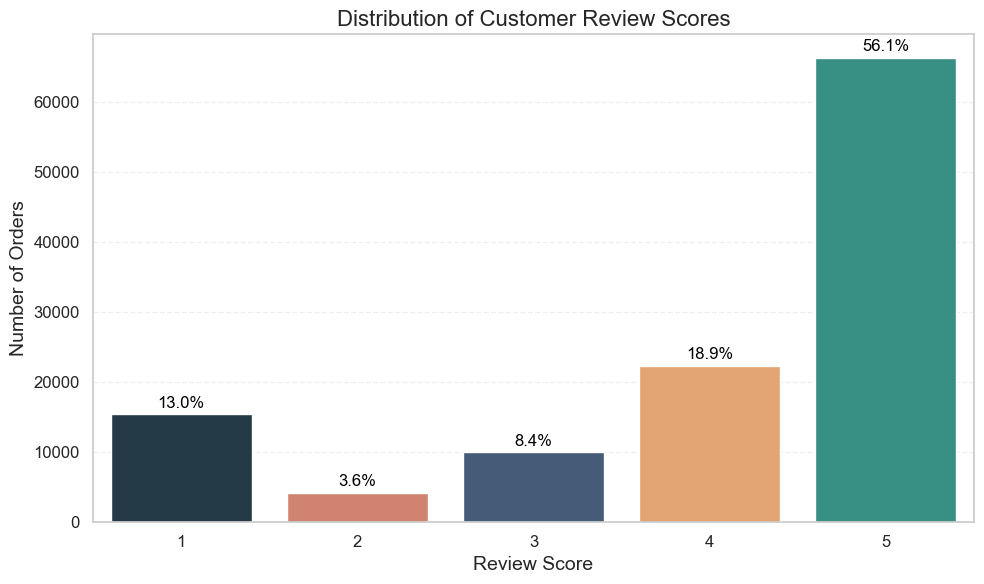

In [143]:
# Calculate the distribution and percentage of review scores
score_counts = df['review_score'].value_counts().sort_index()
score_percentages = score_counts / len(df) * 100

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=score_counts.index, y=score_counts.values, palette=custom_palette)

# Add percentage labels to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{score_percentages.iloc[i]:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 8),
                textcoords='offset points')

plt.title('Distribution of Customer Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Orders')
plt.show()

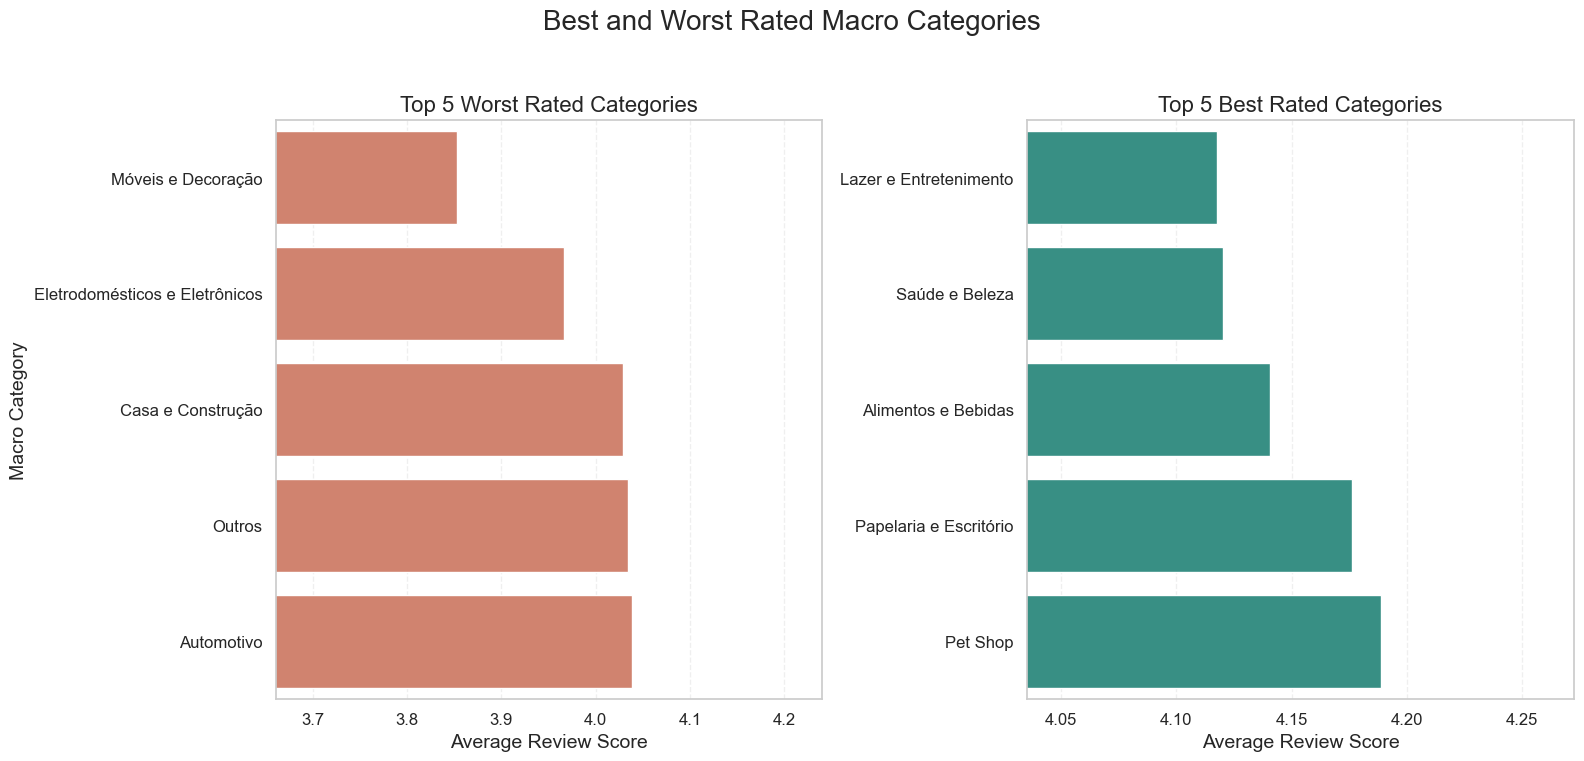

In [144]:
# To avoid skewed results, let's only consider categories with a meaningful number of reviews (e.g., > 50)
category_counts = df['macro_categoria'].value_counts()
popular_categories = category_counts[category_counts > 50].index
df_filtered = df[df['macro_categoria'].isin(popular_categories)]

# Calculate the average review score per macro category
avg_score_by_category = df_filtered.groupby('macro_categoria')['review_score'].mean().sort_values()

# Get the top 5 best and worst rated categories
worst_rated = avg_score_by_category.head(5)
best_rated = avg_score_by_category.tail(5)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Best and Worst Rated Macro Categories', fontsize=20)

# Plot for Worst Rated Categories
sns.barplot(x=worst_rated.values, y=worst_rated.index, ax=axes[0], palette=['#e07a5f']*5)
axes[0].set_title('Top 5 Worst Rated Categories')
axes[0].set_xlabel('Average Review Score')
axes[0].set_ylabel('Macro Category')
axes[0].set_xlim(left=min(worst_rated.values) * 0.95, right=max(worst_rated.values) * 1.05)

# Plot for Best Rated Categories
sns.barplot(x=best_rated.values, y=best_rated.index, ax=axes[1], palette=['#2a9d8f']*5)
axes[1].set_title('Top 5 Best Rated Categories')
axes[1].set_xlabel('Average Review Score')
axes[1].set_ylabel('') # Hide y-label for cleaner look
axes[1].set_xlim(left=min(best_rated.values) * 0.98, right=max(best_rated.values) * 1.02)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Insights
* 70%+ of the reviews are good or very good (4-5)
* There are more very bad reviews (~13%) then bad + mid (12%)
* The worst rated category is the category with higher revenue and number of orders

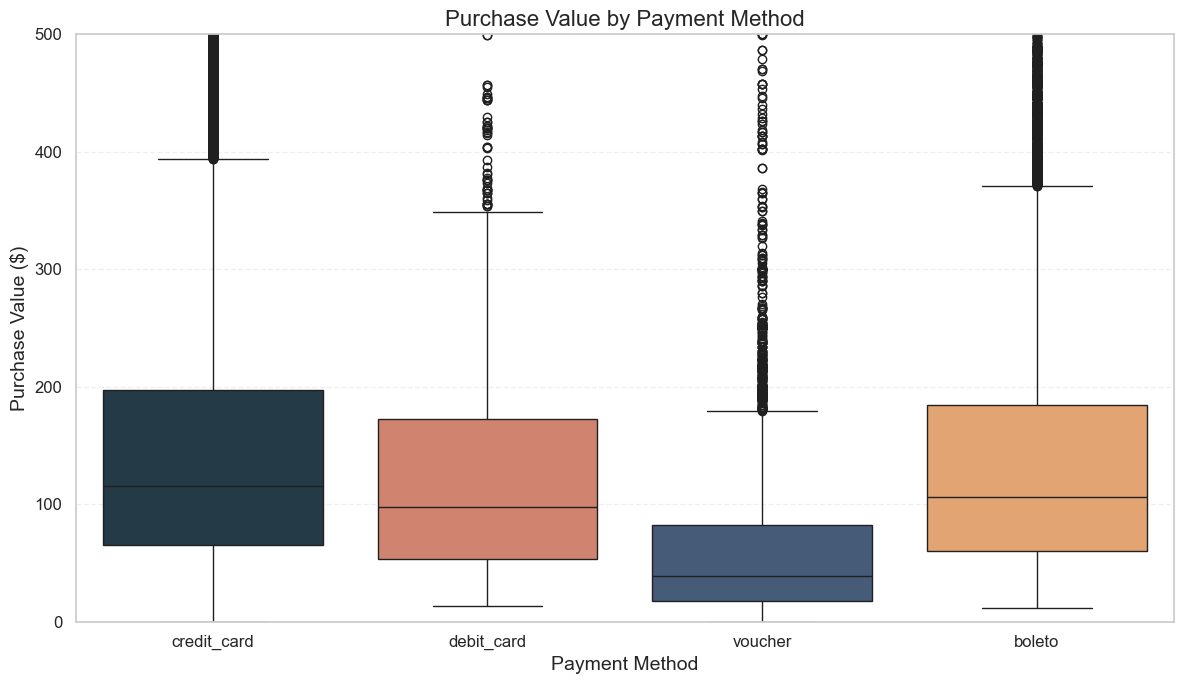

In [145]:
# Create a box plot to show the relationship between payment type and purchase value
plt.figure(figsize=(12, 7))
sns.boxplot(x='payment_type', y='payment_value', data=df, palette=custom_palette)

# Limiting the y-axis for better visualization of the boxes, as outliers can skew the scale.
# Adjust the upper limit based on your data's distribution.
plt.ylim(0, 500) # Example limit, adjust as needed

plt.title('Purchase Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Value ($)')
plt.show()

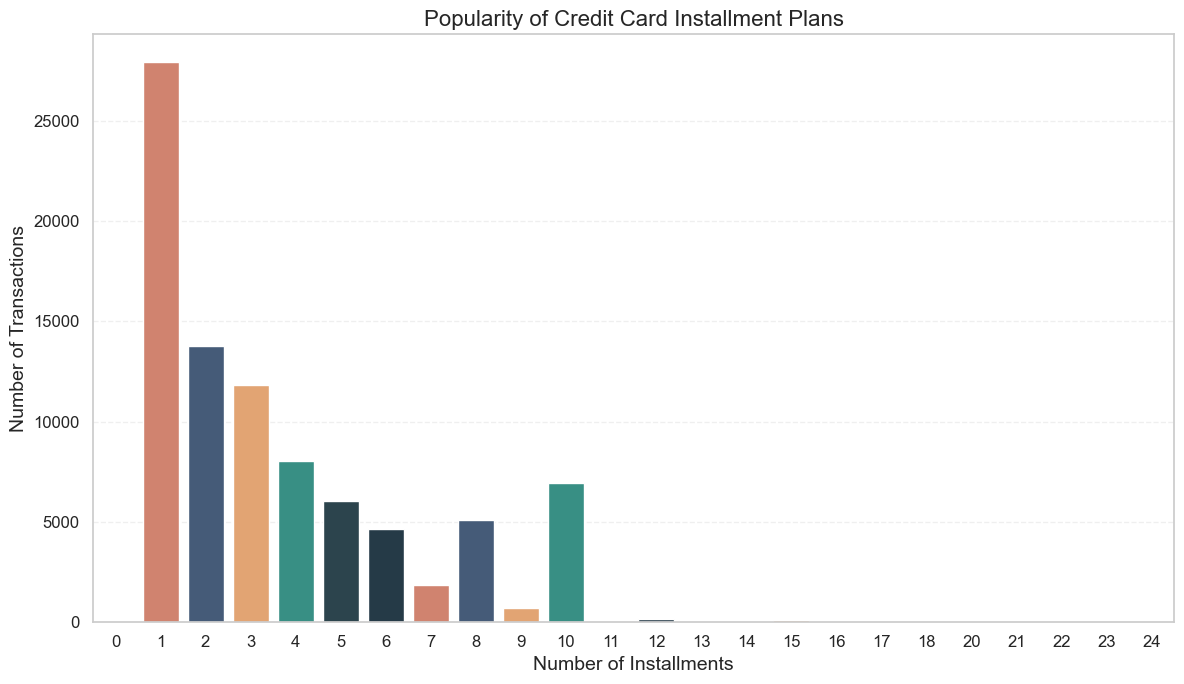

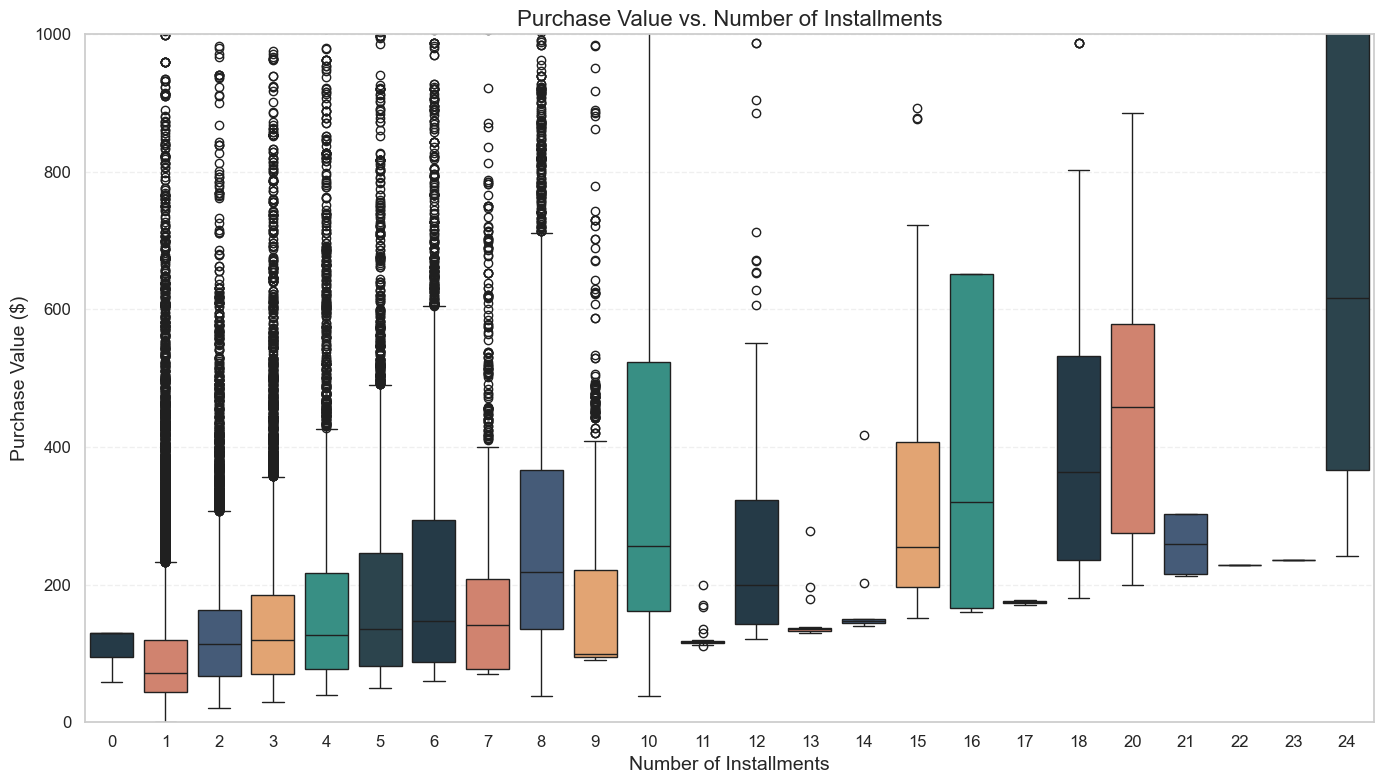

In [146]:

# Filter for credit card payments only
df_credit_card = df[df['payment_type'] == 'credit_card'].copy()

# ---- Part 1: Popularity of Installment Plans ----
plt.figure(figsize=(12, 7))
sns.countplot(x='payment_installments', data=df_credit_card, palette=custom_palette)
plt.title('Popularity of Credit Card Installment Plans')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Transactions')
plt.show()


# ---- Part 2: Purchase Value by Number of Installments ----
plt.figure(figsize=(14, 8))
sns.boxplot(x='payment_installments', y='payment_value', data=df_credit_card, palette=custom_palette)

# Limit the y-axis to see the box distributions more clearly, excluding extreme outliers
# Adjust this value based on your data's characteristics
plt.ylim(0, 1000)

plt.title('Purchase Value vs. Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Purchase Value ($)')
plt.show()

# Insights
* Payment method credit card has shown a bigger range of purchase value in comparison to the other methods, but similar to boleto
* Voucher has shown a lower range of pruchase value, probably due to the limited voucher values
* Most of the transactions are made in 0-1 installment, but we have more transactions that are 2> than 0-1
* If the purchase value is higher it increases the chance of a higher number of installments

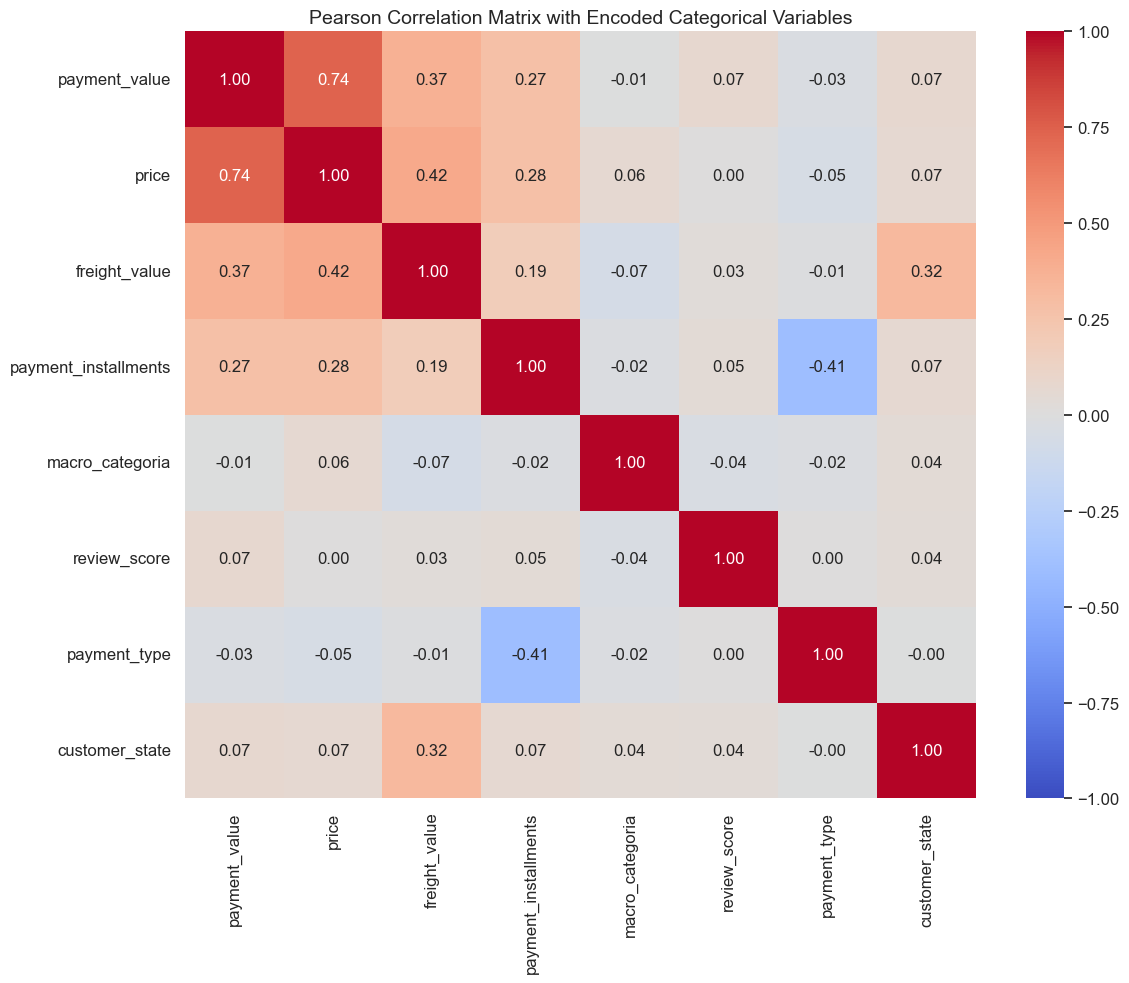

In [149]:
numerical_cols = ['payment_value', 'price', 'freight_value', 'payment_installments']
categorical_cols = ['macro_categoria', 'review_score', 'payment_type', 'customer_state']

# We create a copy of the DataFrame with the selected columns
df_encoded = df[numerical_cols + categorical_cols].copy()

# --- Encoding of Categorical Variables ---
# We will apply encoding to each categorical column.
# The .factorize() method transforms each category into a number and returns the codes.
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].factorize()[0]

# 1. Calculate the Pearson correlation matrix
correlation_matrix_encoded = df_encoded.corr(method='pearson')

# 2. Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix_encoded,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Pearson Correlation Matrix with Encoded Categorical Variables', fontsize=14)

# Save the figure as a PNG file before showing it
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Insights

**Strongest Positive Correlations**
* The strongest relationships indicate that as one variable increases, the other tends to increase as well.

* payment_value and price (0.74): This is the strongest and most logical correlation in the dataset. It shows a strong positive relationship where higher-priced items directly lead to a higher total payment value. This serves as a good sanity check for the data's quality.

* price and freight_value (0.42): A moderate positive correlation. This suggests that more expensive items tend to have higher shipping costs. This could be because they are larger, heavier, or require more secure packaging.

* freight_value and customer_state (0.32): A moderate correlation that must be interpreted carefully (see note below). It suggests that the shipping cost is dependent on the customer's location. This is expected, as shipping to states farther from the distribution centers (like those in the North and Northeast of Brazil) costs more.

**Strongest Negative Correlation**
This is the most notable inverse relationship, where as one variable increases, the other tends to decrease.

* payment_installments and payment_type (-0.41): This is the most significant negative correlation. It indicates that the number of installments is highly dependent on the payment method chosen. This relationship is likely an artifact of the encoding process: payment methods that don't allow installments (like boleto or debit_card) were probably assigned a different numerical code than credit_card. Essentially, this correlation confirms that installments are a feature exclusive to a specific payment type (credit card).